In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from matplotlib import ticker
from matplotlib import patches
rcParams["figure.figsize"] = (10,8)
plt.style.use("science")
import eispac
from glob import glob
import sunpy
import sunpy.map
from sunpy.io.special import read_genx
from sunpy.image.coalignment import calculate_shift
import cmcrameri.cm as cmcm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from astropy.visualization import (ImageNormalize, SqrtStretch, LogStretch,
                                   ZScaleInterval, AsinhStretch)
from scipy import interpolate
from scipy import ndimage
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow, SpectrumFit2D
rcParams['axes.labelsize'] = 18
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['font.size'] = 18
rcParams['figure.figsize'] = [10,10]
rcParams['axes.linewidth'] = 2
rcParams['axes.titlesize'] = 18
from scipy.interpolate import interp1d
import astropy.constants as const
import copy
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
def plot_colorbar(im, ax, width="3%", height="100%",loc="lower left",fontsize=14,
                bbox_to_anchor=(1.02, 0., 1, 1)):
    clb_ax = inset_axes(ax,width=width,height=height,loc=loc,
                bbox_to_anchor=bbox_to_anchor,
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
    clb_ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    clb_ax.yaxis.get_offset_text().set_fontsize(fontsize)
    clb_ax.tick_params(labelsize=fontsize)
    return clb, clb_ax

In [3]:
ch_fex_184_file = "../../sav/EIS/NPCHDB/eispac_fit/eis_20170821_110818.fe_10_184_536.1c-0.fit.h5"
qs_fex_184_file = "../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_10_184_536.1c-0.fit.h5"
ch_fexii_195_file = "../../sav/EIS/NPCHDB/eispac_fit/eis_20170821_110818.fe_12_195_119.1c-0.fit.h5"
qs_fexii_195_file = "../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_12_195_119.1c-0.fit.h5"
ch_feviii_185_file = "../../sav/EIS/NPCHDB/eispac_fit/eis_20170821_110818.fe_08_185_213.1c-0.fit.h5"
qs_fexiv_264_file = "../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_14_264_787.1c-0.fit.h5"

In [4]:
ch_fex_184_fitres = eispac.read_fit(ch_fex_184_file)
ch_fex_184_intmap = ch_fex_184_fitres.get_map(component=0, measurement='intensity')
qs_fex_184_fitres = eispac.read_fit(qs_fex_184_file)
qs_fex_184_intmap = qs_fex_184_fitres.get_map(component=0, measurement='intensity')
ch_fexii_195_fitres = eispac.read_fit(ch_fexii_195_file)
ch_fexii_195_intmap = ch_fexii_195_fitres.get_map(component=0, measurement='intensity')
qs_fexii_195_fitres = eispac.read_fit(qs_fexii_195_file)
qs_fexii_195_intmap = qs_fexii_195_fitres.get_map(component=0, measurement='intensity')
ch_feviii_185_fitres = eispac.read_fit(ch_feviii_185_file)
ch_feviii_185_intmap = ch_feviii_185_fitres.get_map(component=0, measurement='intensity')
qs_fexiv_264_fitres = eispac.read_fit(qs_fexiv_264_file)
qs_fexiv_264_intmap = qs_fexiv_264_fitres.get_map(component=0, measurement='intensity')

Reading fit result from, 
   ../../sav/EIS/NPCHDB/eispac_fit/eis_20170821_110818.fe_10_184_536.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_10_184_536.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Reading fit result from, 
   ../../sav/EIS/NPCHDB/eispac_fit/eis_20170821_110818.fe_12_195_119.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_12_195_119.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Reading fit result from, 
   ../../sav/EIS/NPCHDB/eispac_fit/eis_20170821_110818.fe_08_185_213.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_f

In [25]:
qs_shiftx, qs_shifty = 4.5*u.arcsec, -4*u.arcsec
ch_shiftx, ch_shifty = -4.09618*u.arcsec, -2.50511*u.arcsec

ch_fex_184_intmap_shifted = ch_fex_184_intmap.shift(ch_shiftx, ch_shifty)
qs_fex_184_intmap_shifted = qs_fex_184_intmap.shift(qs_shiftx, qs_shifty)
ch_fexii_195_intmap_shifted = ch_fexii_195_intmap.shift(ch_shiftx, ch_shifty)
qs_fexii_195_intmap_shifted = qs_fexii_195_intmap.shift(qs_shiftx, qs_shifty)
ch_feviii_185_intmap_shifted = ch_feviii_185_intmap.shift(ch_shiftx, ch_shifty)
qs_fexiv_264_intmap_shifted = qs_fexiv_264_intmap.shift(qs_shiftx, qs_shifty)

In [6]:
def plot_eismap(eismap,ax,cmap,xticklabel=True,yticklabel=False,norm=None,
                linename=None):
    if norm is None:
        norm = ImageNormalize(eismap.data, interval=ZScaleInterval(), stretch=AsinhStretch())
    ax.imshow(eismap.data,aspect=eismap.meta["cdelt2"]/eismap.meta["cdelt1"],
              cmap=cmap,norm=norm)
    
    ax.set_xlabel(" ")
    ax.set_ylabel(" ")

    ax.tick_params(which="both",direction="in")
    ax.tick_params(which="major",length=6)
    ax.tick_params(which="minor",length=4)
    ax.tick_params(axis="x",labelbottom=xticklabel)
    ax.tick_params(axis="y",labelleft=yticklabel)
    ax.coords[0].set_ticks(number=4)

    if linename is not None:
        title = r"\textbf{{EIS}} {:}".format(linename)+"\n"+\
                r"\textbf{{{:}}}".format(eismap.date_average.strftime("%Y-%m-%d %H:%M:%S"))
        title = ax.set_title(title,fontsize=17)
        title.set_multialignment("center")

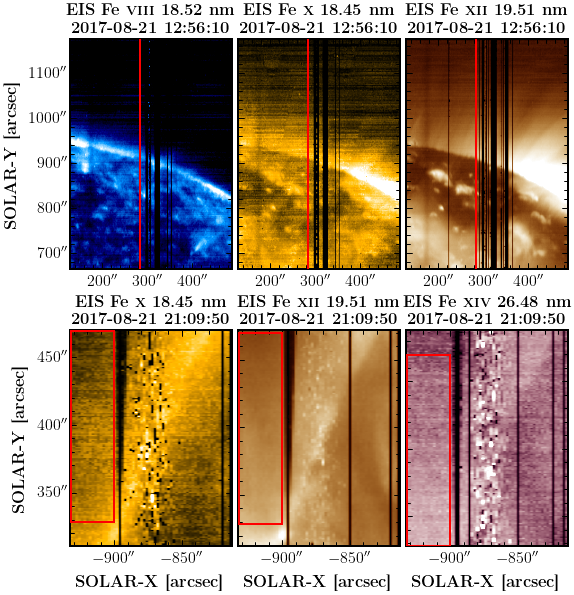

In [29]:
fig = plt.figure(figsize=(7,8),constrained_layout=True)

ax1 = fig.add_subplot(2,3,1,projection=ch_feviii_185_intmap_shifted)
plot_eismap(ch_feviii_185_intmap, ax1, plt.get_cmap("sohoeit171"),yticklabel=True,
            linename=r"\textbf{{Fe \textsc{{viii}} 18.52 nm}}")

ax2 = fig.add_subplot(2,3,2,projection=ch_fex_184_intmap_shifted)
plot_eismap(ch_fex_184_intmap, ax2, plt.get_cmap("sdoaia171"),
            linename=r"\textbf{{Fe \textsc{{x}} 18.45 nm}}")

ax3 = fig.add_subplot(2,3,3,projection=ch_fexii_195_intmap_shifted)
plot_eismap(ch_fexii_195_intmap, ax3, plt.get_cmap("sdoaia193"),
            linename=r"\textbf{{Fe \textsc{{xii}} 19.51 nm}}")

ax4 = fig.add_subplot(2,3,4,projection=qs_fex_184_intmap_shifted)
plot_eismap(qs_fex_184_intmap, ax4, plt.get_cmap("sdoaia171"),yticklabel=True,
            linename=r"\textbf{{Fe \textsc{{x}} 18.45 nm}}")

ax5 = fig.add_subplot(2,3,5,projection=qs_fexii_195_intmap_shifted)
plot_eismap(qs_fexii_195_intmap, ax5, plt.get_cmap("sdoaia193"),
            norm=ImageNormalize(qs_fexii_195_intmap.data, interval=ZScaleInterval(),
                                stretch=AsinhStretch(0.5)),
            linename=r"\textbf{{Fe \textsc{{xii}} 19.51 nm}}")

ax6 = fig.add_subplot(2,3,6,projection=qs_fexiv_264_intmap_shifted)
plot_eismap(qs_fexiv_264_intmap, ax6, plt.get_cmap("sdoaia211"),
            linename=r"\textbf{{Fe \textsc{{xiv}} 26.48 nm}}")

for ax_ in (ax1,ax2,ax3):
    ax_.axvline(77,color="red",alpha=1,zorder=6,linewidth=2)

for ax_ in (ax4,ax5,ax6):
    ax_.add_patch(patches.Rectangle((qs_fexiv_264_intmap_shifted.bottom_left_coord.Tx.to("deg").value,
                                     qs_fexiv_264_intmap_shifted.bottom_left_coord.Ty.to("deg").value),32/3600,
                                     qs_fex_184_intmap_shifted.top_right_coord.Ty.to("deg").value - \
                                     qs_fexiv_264_intmap_shifted.bottom_left_coord.Ty.to("deg").value,linewidth=2,edgecolor="red",
                            facecolor="none",alpha=1,zorder=6,transform=ax_.get_transform("world")))
    



ax1.set_ylabel(r"\textbf{SOLAR-Y [arcsec]}",fontsize=17)
ax4.set_ylabel(r"\textbf{SOLAR-Y [arcsec]}",fontsize=17)
ax4.set_xlabel(r"\textbf{SOLAR-X [arcsec]}",fontsize=17)
ax5.set_xlabel(r"\textbf{SOLAR-X [arcsec]}",fontsize=17)
ax6.set_xlabel(r"\textbf{SOLAR-X [arcsec]}",fontsize=17)

# plt.savefig(fname="../../figs/ms/eis_quicklook.pdf",format="pdf",dpi=300,
#             bbox_inches="tight")


In [16]:
ax4.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  
CRVAL : -0.25882405784395  0.086270489162869  
CRPIX : 1.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.00055466665161981  0.00027777777777778  
NAXIS : 60  160

In [19]:
qs_fexiv_264_intmap_shifted.bottom_left_coord.Ty.to("deg").value

0.0915900468234554

In [10]:
qs_fexiv_264_intmap_shifted.top_right_coord.Ty - qs_fex_184_intmap_shifted.top_right_coord.Ty

<Angle 19.15040445 arcsec>

In [11]:
qs_fexiv_264_intmap_shifted.top_right_coord.Ty - qs_fexii_195_intmap_shifted.top_right_coord.Ty

<Angle 17.34260446 arcsec>